In [ ]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Importing the dataset

df = pd.read_csv('/content/User_Data.csv')

In [ ]:
#viewing the dataset
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
X = df.iloc[:, [2,3]].values
Y = df.iloc[:, 4].values

In [ ]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
# Fitting the Logistic Regression into the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, Y_Train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the test set results

Y_Pred = classifier.predict(X_Test)
Y_Pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(x, y, w, b):
    m = len(y)
    z = np.dot(x, w) + b
    h = sigmoid(z)
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient descent function
def gradient_descent(x, y, w, b, alpha, epochs):
    m = len(y)
    cost_history = []
    for _ in range(epochs):
        z = np.dot(x, w) + b
        h = sigmoid(z)
        dw = (1 / m) * np.dot(x.T, (h - y))
        db = (1 / m) * np.sum(h - y)
        w -= alpha * dw
        b -= alpha * db
        cost = cost_function(x, y, w, b)
        cost_history.append(cost)
    return w, b, cost_history

# Initialize parameters
w = np.zeros(X_Train.shape[1])
b = 0
alpha = 0.1  # Increased learning rate for better convergence
epochs = 5000  # Increased iterations for better optimization

# Train model using gradient descent
w, b, cost_history = gradient_descent(X_Train, Y_Train, w, b, alpha, epochs)

In [ ]:
def predict(x, w, b):
    return sigmoid(np.dot(x, w) + b) >= 0.5

y_pred = predict(X_Test, w, b)
print("Accuracy score=", "{:.2f}".format(accuracy_score(Y_Test, y_pred) * 100))
print("Confusion matrix=\n", confusion_matrix(Y_Test, y_pred))
print("Classification report=\n", classification_report(Y_Test, y_pred))

Accuracy score= 89.00
Confusion matrix=
 [[65  3]
 [ 8 24]]
Classification report=
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



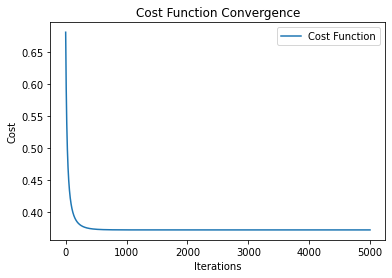

In [ ]:
plt.plot(range(len(cost_history)), cost_history, label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()



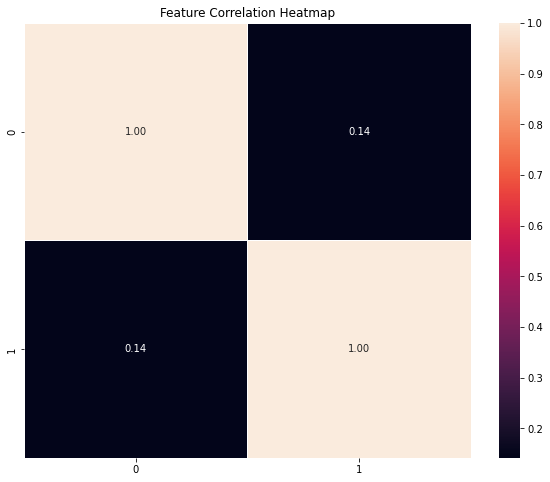

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_Train).corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[65,  3],
       [ 8, 24]])

<AxesSubplot:>

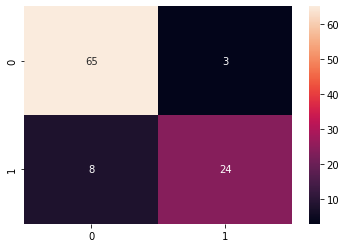

In [ ]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)